In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [87]:
#data shape = ((34872, 16, 45)) after preprocessing

#  train_EEG   test_EEG  split here
#   train_labels test_labels  split here

with open('all_epochs.npy', 'rb') as f:
    X = np.load(f)
    
with open('all_labels.npy', 'rb') as f:
    y = np.load(f)

X.shape, y.shape

((14424, 16, 45), (14424,))

In [88]:
X = X[:,:,:,None]

np.random.shuffle(X)
np.random.shuffle(y)

X.shape

X_true = X[y == 1,:,:,:]
print(X_true.shape)

y_true = y[y==1]
y_false = y[y==0]
X_false = X[y== 0 ,:,:,:]
y_false = y_false[:5000]
X_false = X_false[:5000,:,:,:]

X_down = np.concatenate((X_true,X_false), axis = 0)
y_down = np.concatenate((y_true,y_false), axis = 0)

print(X_false.shape)
print(X_down.shape, y_down.shape)

(2404, 16, 45, 1)
(5000, 16, 45, 1)
(7404, 16, 45, 1) (7404,)


In [89]:
def build_model(use_batchnorm=False, dropout_rate=0.):

  layers = []

  layers.append(tf.keras.layers.Conv2D(5 ,(3,1), activation='relu', input_shape=(16, 45, 1)))
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  if dropout_rate > 0: layers.append(tf.keras.layers.Dropout(dropout_rate))
  layers.append(tf.keras.layers.MaxPool2D((1,2)))

  layers.append(tf.keras.layers.Conv2D(10, (3,1), activation = 'relu'))
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  if dropout_rate > 0: layers.append(tf.keras.layers.Dropout(dropout_rate))

  layers.append(tf.keras.layers.Conv2D(4, (1,5), activation = 'relu'))
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  if dropout_rate > 0: layers.append(tf.keras.layers.Dropout(dropout_rate))

  layers.append(tf.keras.layers.Flatten())
  layers.append(tf.keras.layers.Dense(32, activation = 'relu'))
  if use_batchnorm: layers.append(tf.keras.layers.BatchNormalization())
  if dropout_rate > 0: layers.append(tf.keras.layers.Dropout(dropout_rate))
  layers.append(tf.keras.layers.Dense(2))
  

  model = tf.keras.Sequential(layers)
  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])
  return model

model_CNN = build_model(use_batchnorm=True, dropout_rate=0.04)
model_CNN.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 14, 45, 5)         20        
_________________________________________________________________
batch_normalization_52 (Batc (None, 14, 45, 5)         20        
_________________________________________________________________
dropout_52 (Dropout)         (None, 14, 45, 5)         0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 22, 5)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 12, 22, 10)        160       
_________________________________________________________________
batch_normalization_53 (Batc (None, 12, 22, 10)        40        
_________________________________________________________________
dropout_53 (Dropout)         (None, 12, 22, 10)      

In [98]:
model_CNN.fit(X, y, epochs=30)

test_loss, test_acc = model_CNN.evaluate(X,  y, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/30
451/451 [==============================] - 9s 20ms/step - loss: 0.3173 - sparse_categorical_accuracy: 0.8653
Epoch 2/30
451/451 [==============================] - 9s 19ms/step - loss: 0.2631 - sparse_categorical_accuracy: 0.8841: 5s - loss: 0. - ETA: 2s -
Epoch 3/30
451/451 [==============================] - 9s 19ms/step - loss: 0.2446 - sparse_categorical_accuracy: 0.8931
Epoch 4/30
451/451 [==============================] - 9s 19ms/step - loss: 0.2353 - sparse_categorical_accuracy: 0.8988A: 4s - loss: 0.2214 -  - ETA: 2s - loss: 0.22
Epoch 5/30
451/451 [==============================] - 9s 19ms/step - loss: 0.2301 - sparse_categorical_accuracy: 0.9022
Epoch 6/30
451/451 [==============================] - 9s 19ms/step - loss: 0.2202 - sparse_categorical_accuracy: 0.9056
Epoch 7/30
451/451 [==============================] - 9s 19ms/step - loss: 0.2167 - sparse_categorical_accuracy: 0.9087
Epoch 8/30
451/451 [==============================] - 9s 19ms/step - loss: 0.2176 - spa

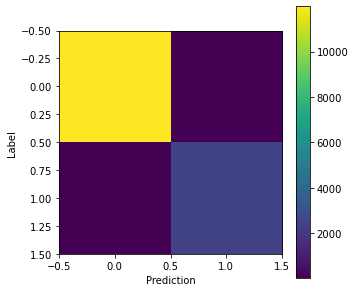

tf.Tensor(
[[11990    30]
 [   46  2358]], shape=(2, 2), dtype=int32)


In [99]:
y_pred = np.argmax(model_CNN.predict(X), axis=1)
y_true = y



confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(5, 5))

plt.imshow(confusion_mtx)


plt.xlabel('Prediction')
plt.ylabel('Label')
plt.colorbar()
plt.show()

print(confusion_mtx)

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

print('f1 score: ', f1_score(y_true, y_pred))
print('roc_auc score: ', roc_auc_score(y_true, y_pred))

f1 score:  0.9841402337228715
roc_auc score:  0.9891846921797005
